# Image Processing 4 - Stitching photo mosaics

### اماني عبدالحميد عبدالرحمن طه ابراهيم        1300308
### Email: amanyabdo1194@gmail.com

## Import Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

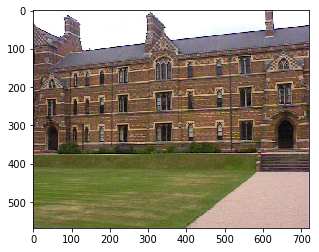

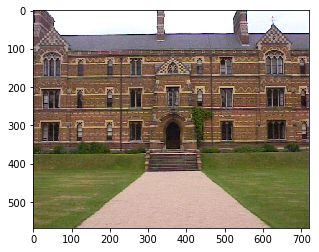

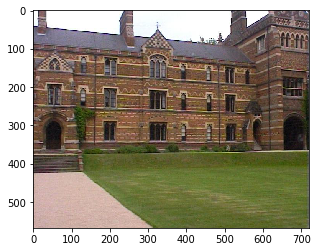

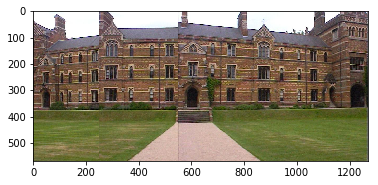

In [2]:
image1 = cv2.imread('keble_a.jpg',1)
ref_image = cv2.imread('keble_b.jpg',1)
image3 = cv2.imread('keble_c.jpg',1)

img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
ref_img = cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

concatenated1 = np.concatenate((img1[0:img1.shape[0],0:250],ref_img),axis=1)
concatenated2 = np.concatenate((concatenated1[0:img1.shape[0],0:550],img3),axis=1)
plt.imshow(img1)
plt.show()
plt.imshow(ref_img)
plt.show()
plt.imshow(img3)
plt.show()

#note this is the concatenated image of three images  
plt.imshow(concatenated2)
plt.show()

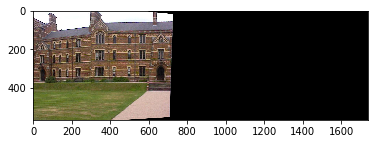

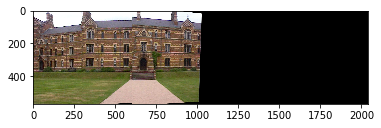

In [3]:
# detect keypoints and extract local invariant descriptors from them
orb = cv2.ORB_create()
(kpsA, featuresA) = orb.detectAndCompute(img1,None)
(kpsB, featuresB) = orb.detectAndCompute(ref_img,None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.knnMatch(featuresA,featuresB,k=2)

#get good matches
good=[]
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append((m.trainIdx, m.queryIdx))
        
# Sort them in the order of their distance.
#matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
#res = cv2.drawMatches(img1,kpsA,ref_img,kpsB,matches[:10],None, flags=2)
#res = cv2.drawMatches(img1,kpsA,ref_img,kpsB,good,None, flags=2)

#construct points from key points
if len(good) > 4:
    # construct the two sets of points
    ptsA = np.float32([kpsA[i].pt for (_, i) in good])
    ptsB = np.float32([kpsB[i].pt for (i, _) in good])
    
#use these points to find homography     
(H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,4.0) 

#warpPerspective the images 
res = cv2.warpPerspective(img1, H,(img1.shape[1] + ref_img.shape[1], img1.shape[0]))
resu= cv2.warpPerspective(ref_img, H,(img1.shape[1] + ref_img.shape[1], ref_img.shape[0]))

#concatenate results to get final image Panorama     
res_o =   np.concatenate((img1[0:img1.shape[0],0:300],res), axis=1)      
result = np.concatenate((res_o[0:img1.shape[0],0:600],resu), axis=1)

plt.imshow(res_o)
plt.show()
plt.imshow(result)
plt.show()

#this is the concatenate image1 and image2
#In next cell we will concatenate image 3 with image 2 then concatenate the result to the result of img1 with img2

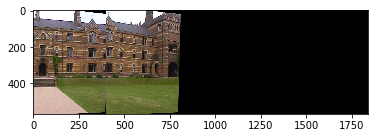

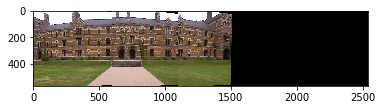

In [4]:
# detect keypoints and extract local invariant descriptors from them
orb = cv2.ORB_create()
(kpsA, featuresA) = orb.detectAndCompute(ref_img,None)
(kpsB, featuresB) = orb.detectAndCompute(img3,None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.knnMatch(featuresA,featuresB,k=2)

#get good matches
good=[]
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append((m.trainIdx, m.queryIdx))
        
# Sort them in the order of their distance.
#matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
#res = cv2.drawMatches(img1,kpsA,ref_img,kpsB,matches[:10],None, flags=2)
#res = cv2.drawMatches(img1,kpsA,ref_img,kpsB,good,None, flags=2)

#construct points from key points
if len(good) > 4:
    # construct the two sets of points
    ptsA = np.float32([kpsA[i].pt for (_, i) in good])
    ptsB = np.float32([kpsB[i].pt for (i, _) in good])
 
 #use these points to find homography
(H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,4.0) 

#warpPerspective the images
res = cv2.warpPerspective(ref_img, H,(ref_img.shape[1] + img3.shape[1], ref_img.shape[0]))
resu= cv2.warpPerspective(img3, H,(ref_img.shape[1] + img3.shape[1], ref_img.shape[0]))

     
 #concatenate results to get final image Panorama      
result2 = np.concatenate((res[0:img3.shape[0],0:400],resu), axis=1)
result3 = np.concatenate((result[0:img3.shape[0],0:700],result2), axis=1)


plt.imshow(result2)
plt.show()
plt.imshow(result3)
plt.show()

#finally result 3 is the final image

                                         Thank You